<a href="https://colab.research.google.com/github/Ashuradhipathi/House-Price-Prediction/blob/main/House_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install numpy pandas scikit-learn matplotlib seaborn

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [46]:
data = pd.read_csv("housing.csv")

In [47]:
print(data.head())
print(data.columns)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
      

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [49]:
house_data = data.dropna()# drop those with NA if they are less; inpalce = True if the same dataset is to be modified
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [80]:
train_data = house_data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

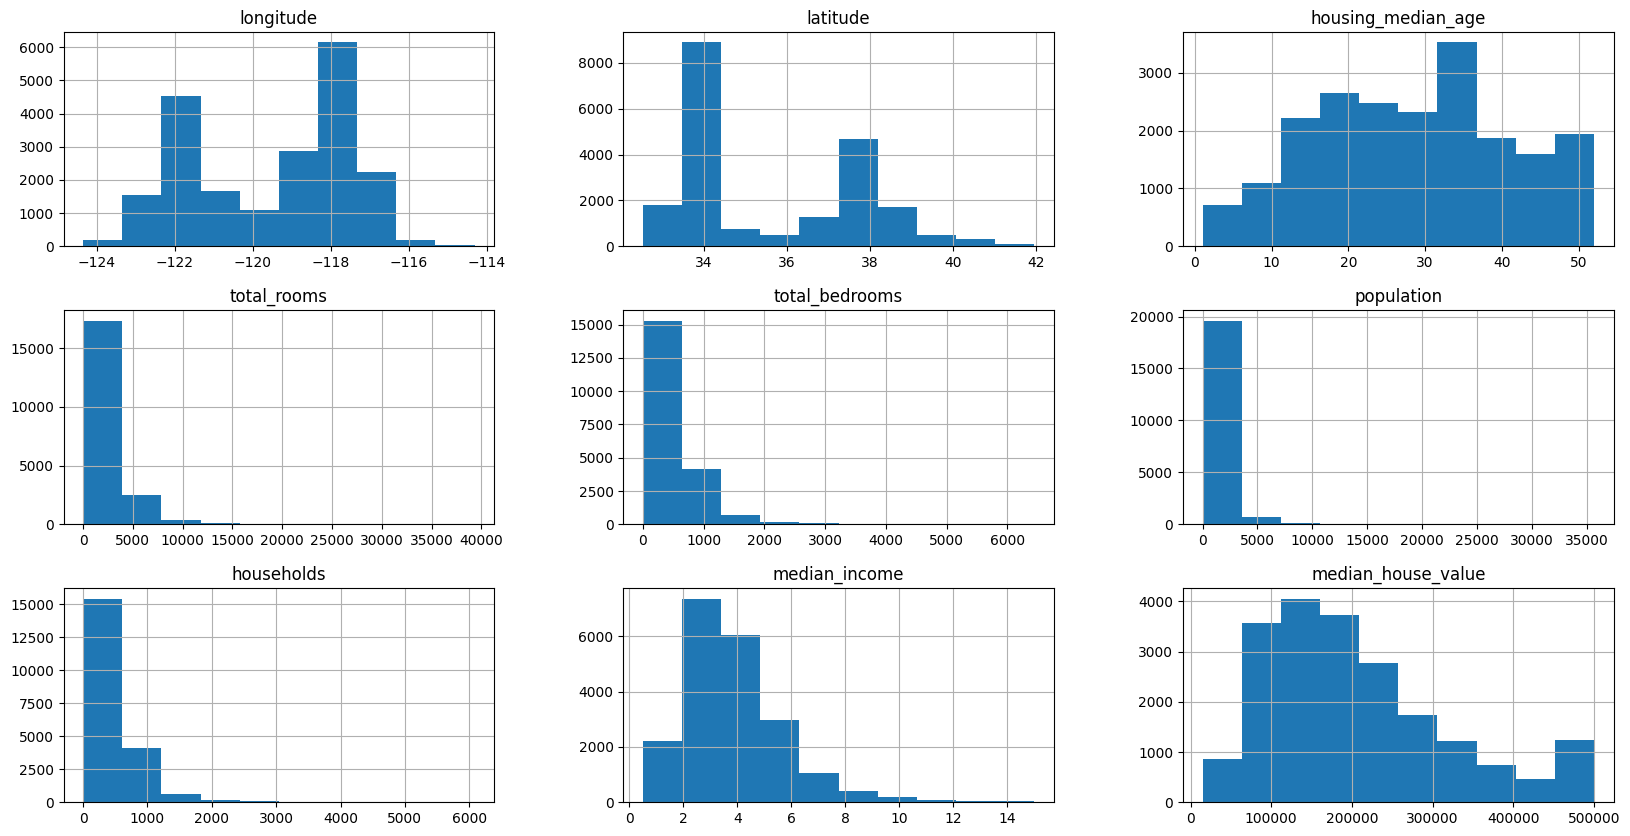

In [81]:
train_data.hist(figsize=(20,10))

<ipython-input-82-4e5b9498a5c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

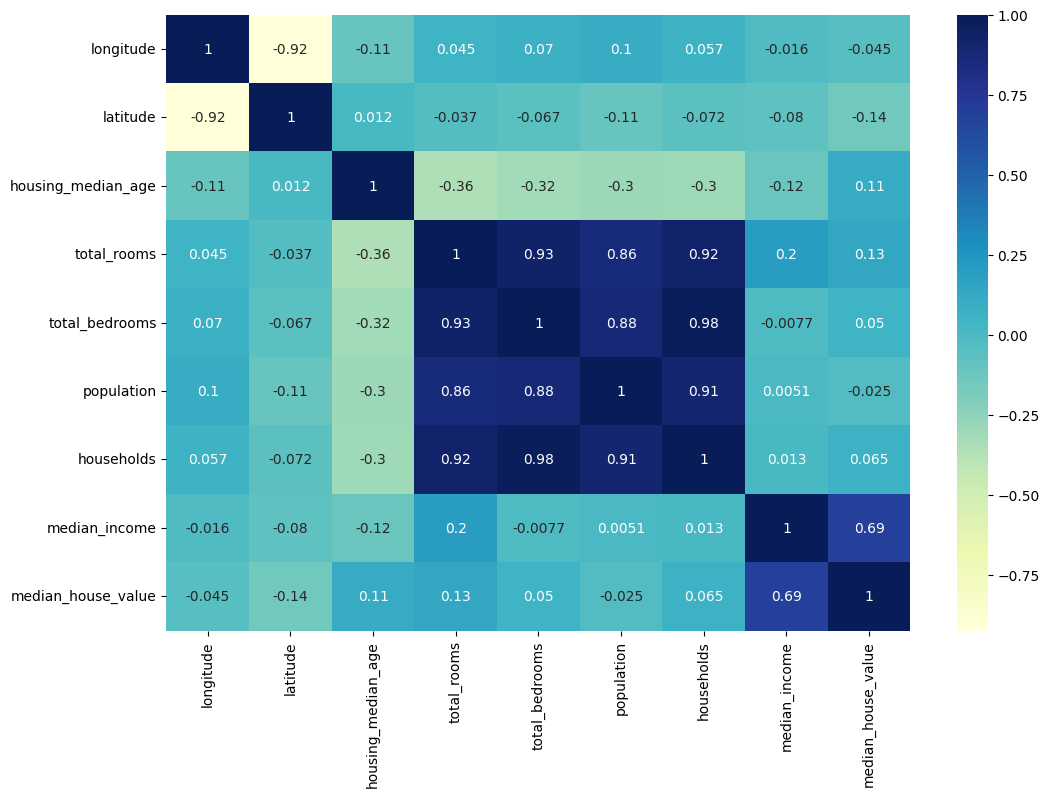

In [82]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [83]:
#Changing those values which doesnt appear in bell shape
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

<ipython-input-83-f7fa7597ef79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
<ipython-input-83-f7fa7597ef79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
<ipython-input-83-f7fa7597ef79>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

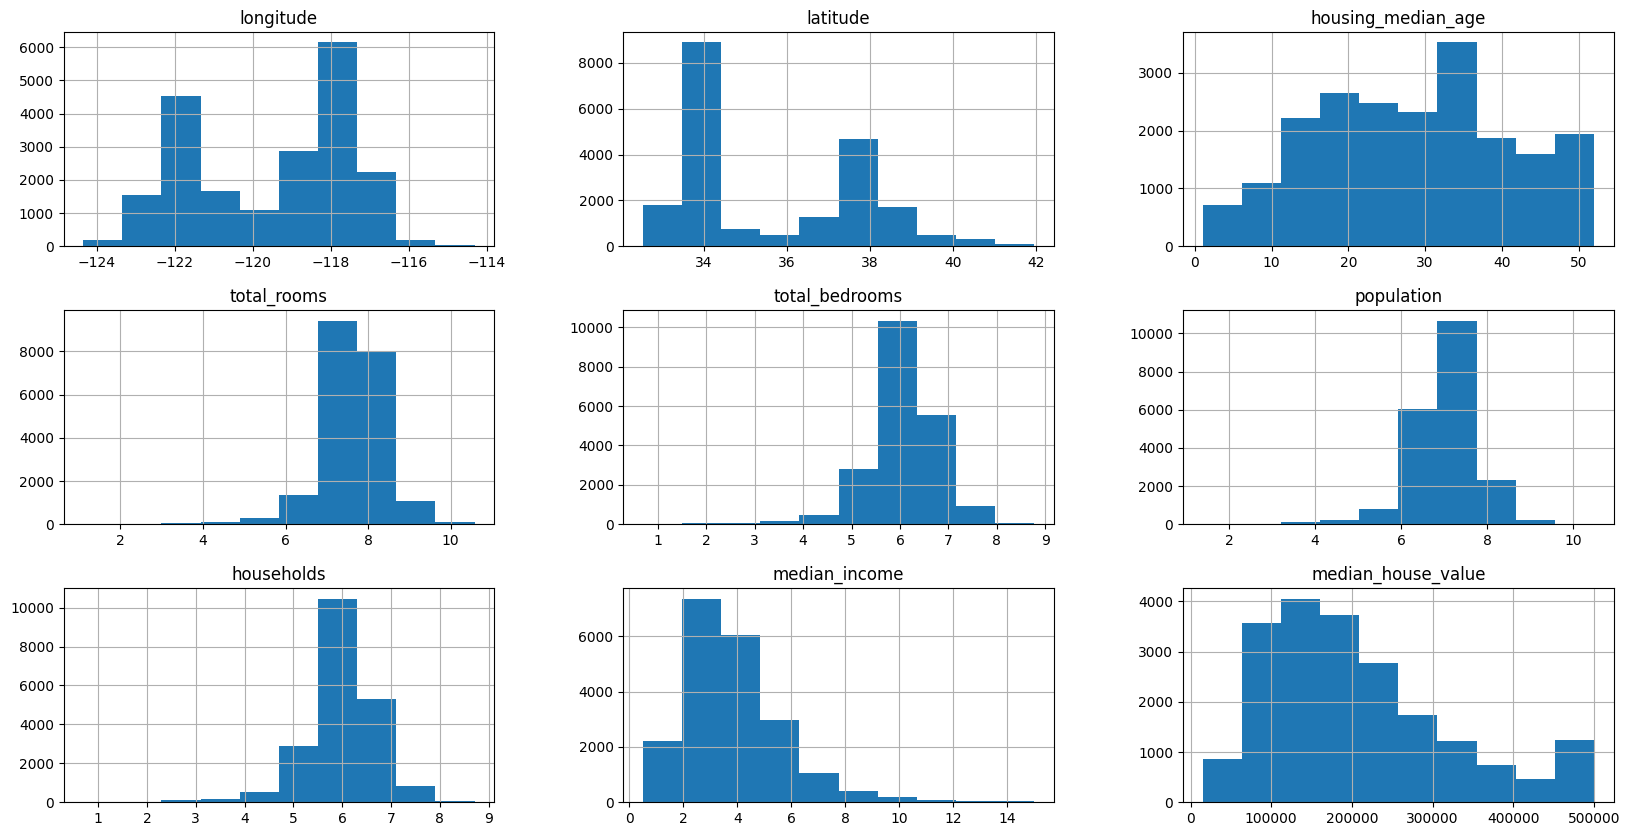

In [84]:
train_data.hist(figsize=(20,10))

In [85]:
train_data.ocean_proximity.value_counts()#Knowing categorical data

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [86]:
 # after join it has to be allocated to a variable
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

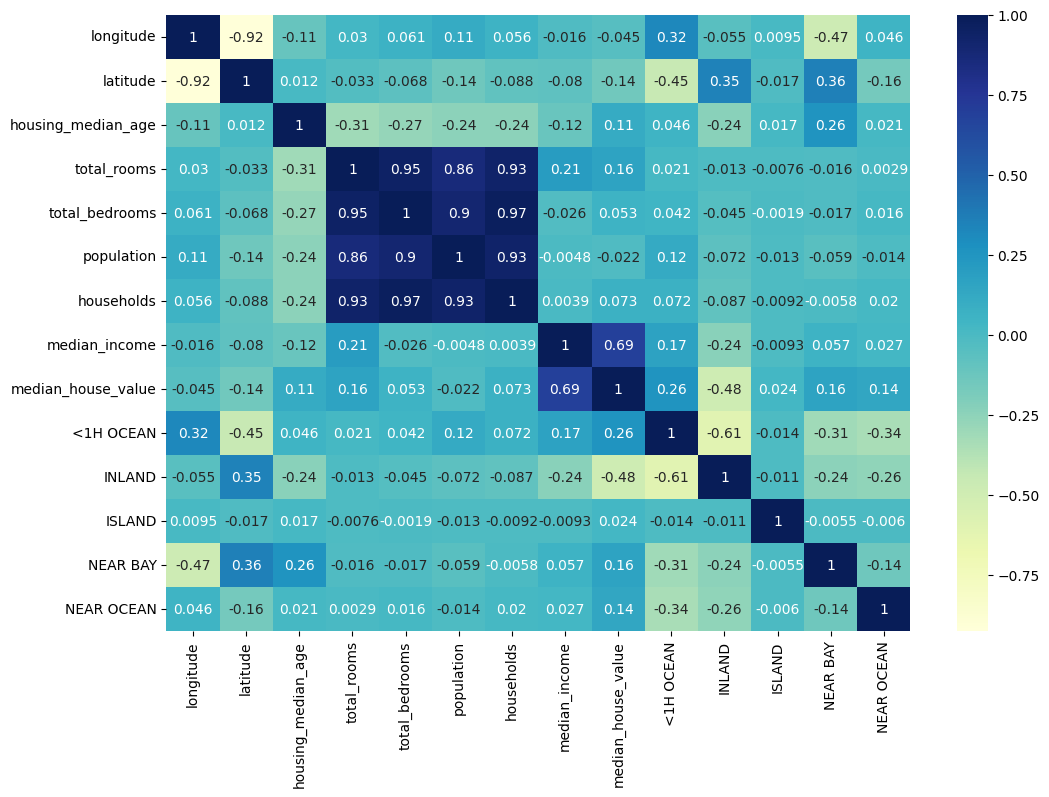

In [87]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

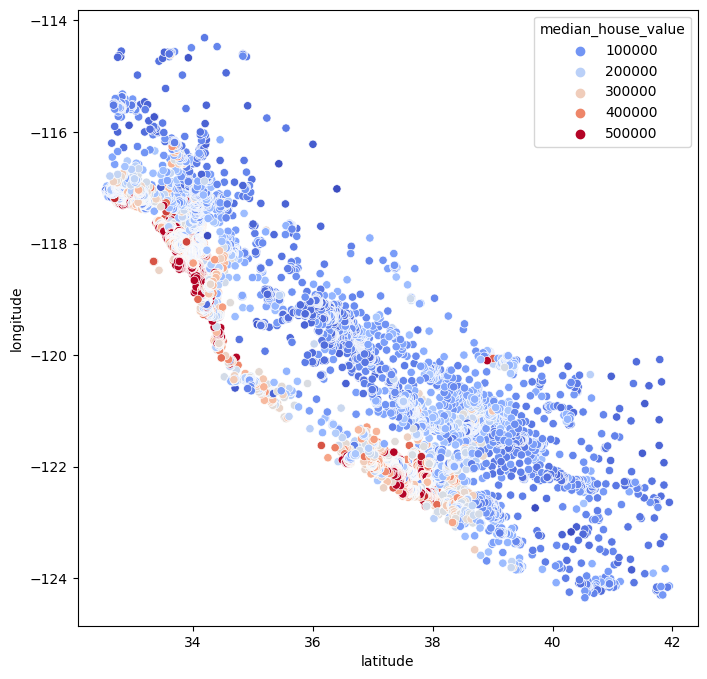

In [88]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="latitude", y="longitude", data = train_data, hue="median_house_value", palette="coolwarm")
plt.show()

In [89]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/ train_data['households']

<Axes: >

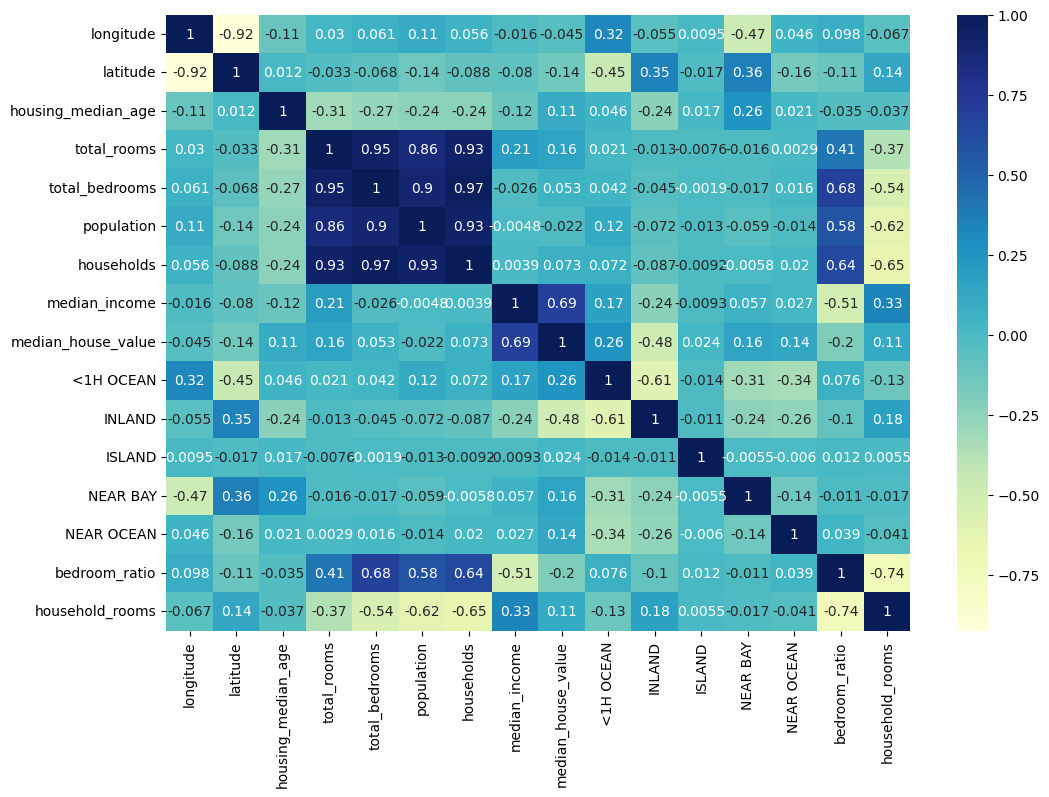

In [90]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [91]:
lr = LinearRegression()
X = train_data.drop('median_house_value',axis=1)
y = train_data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [92]:
lr.fit(X_train,y_train)

LinearRegression()

In [93]:
y_pred = lr.predict(X_test)

In [102]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19853,-119.35,36.42,18.0,7.017506,5.267858,7.463363,5.176150,2.7969,0,1,0,0,0,0.750674,1.355739
3066,-119.25,35.78,27.0,7.322510,5.837730,7.205635,5.780744,2.7411,0,1,0,0,0,0.797231,1.266707
5184,-118.27,33.94,38.0,7.181592,5.765191,6.985642,5.655992,1.5872,1,0,0,0,0,0.802773,1.269732
9932,-122.30,38.29,25.0,7.439559,6.059123,6.929517,5.991465,3.0404,0,0,0,1,0,0.814447,1.241693
1242,-122.00,38.99,39.0,7.345365,5.780744,6.704414,5.659482,2.9489,0,1,0,0,0,0.786992,1.297886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13945,-117.20,34.26,17.0,9.150590,7.283448,7.232010,6.131226,6.2233,0,1,0,0,0,0.795954,1.492457
12352,-116.54,33.81,31.0,8.826881,7.447168,7.874359,7.201916,2.1176,0,1,0,0,0,0.843692,1.225630
2243,-119.79,36.82,25.0,7.754053,6.137727,7.103322,6.148468,3.2143,0,1,0,0,0,0.791551,1.261136
6918,-118.00,33.96,37.0,7.789455,5.780744,6.778785,5.723585,9.1541,1,0,0,0,0,0.742124,1.360940


In [103]:
y_train

19853    123800.0
3066      59800.0
5184      89800.0
9932     142100.0
1242      67500.0
           ...   
13945    230900.0
12352    124100.0
2243      93000.0
6918     453800.0
18657    263800.0
Name: median_house_value, Length: 16346, dtype: float64

In [104]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1379,-122.07,38.00,37.0,6.886532,5.313206,6.137727,5.220356,3.6250,0,0,0,1,0,0.771536,1.319169
2389,-119.48,37.00,16.0,7.974189,6.313548,7.291656,6.234411,3.1736,0,1,0,0,0,0.791748,1.279061
5131,-118.27,33.98,44.0,7.451822,6.126869,7.686162,5.996452,2.1250,1,0,0,0,0,0.822197,1.242705
17194,-119.79,34.45,24.0,7.918265,6.073045,6.981935,5.942799,5.8635,0,0,0,0,1,0.766967,1.332413
8826,-118.36,34.09,30.0,7.763871,6.591674,7.219642,6.577861,2.0702,1,0,0,0,0,0.849019,1.180303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14734,-117.02,32.81,14.0,8.062748,6.396930,7.280697,6.373320,3.7292,1,0,0,0,0,0.793393,1.265078
431,-122.29,37.88,52.0,7.677864,6.052089,6.715383,5.963579,3.8897,0,0,0,1,0,0.788252,1.287459
13302,-117.62,34.07,15.0,8.309431,6.699500,7.967280,6.599870,3.3936,0,1,0,0,0,0.806253,1.259029
19646,-120.79,37.49,44.0,7.079184,5.420535,6.533789,5.459586,3.4167,0,1,0,0,0,0.765700,1.296652


In [105]:
y_test

1379     156300.0
2389     111800.0
5131      92500.0
17194    348700.0
8826     283300.0
           ...   
14734    182200.0
431      218400.0
13302    127000.0
19646    160700.0
15786    187500.0
Name: median_house_value, Length: 4087, dtype: float64

In [107]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 68.0%
